In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import requests as req
import pandas as pd
import numpy as np
import seaborn
import random
import json

In [27]:
#Import needed files

nominees_list = pd.DataFrame.from_csv("Comment_Sentiment_Analysis_SOY.csv", index_col=None, encoding='utf-8')
master_list = pd.DataFrame.from_csv("Updated_List_Nominations.csv", index_col=None, encoding='utf-8')

nominees_list.head()
master_list.head()

master_list['SOY Combined'] = master_list['SONG OF THE YEAR'] + " " + master_list['SOY ARTIST']
master_list.head()

rev_master_list = master_list[["SOY Combined", "SONG OF THE YEAR"]]
rev_master_list = rev_master_list.rename(columns={"SOY Combined":"Song"})
rev_master_list.head()
nominees_list.head()

,Unnamed: 0,Song,Year,Compound,SOY,Color
0,0,1-800-273-8255 Logic Alessia Cara Khalid,2018,0.647073,L,blue
1,1,4:44 JAY-Z,2018,0.052994,L,blue
2,14,Despacito Luis Fonsi Daddy Yankee Justin Bieber,2018,0.436808,L,blue
3,23,Issues Julia Michaels,2018,0.519460,L,blue
4,43,That's What I Like Bruno Mars,2018,0.415051,L,blue


In [29]:
#Merge Data

merge_list = nominees_list.merge(rev_master_list, how="outer", on="Song")

merge_list.head()



,Unnamed: 0,Song,Year,Compound,SOY,Color,SONG OF THE YEAR
0,0.0,1-800-273-8255 Logic Alessia Cara Khalid,2018.0,0.647073,L,blue,1-800-273-8255
1,1.0,4:44 JAY-Z,2018.0,0.052994,L,blue,4:44
2,14.0,Despacito Luis Fonsi Daddy Yankee Justin Bieber,2018.0,0.436808,L,blue,Despacito
3,23.0,Issues Julia Michaels,2018.0,0.519460,L,blue,Issues
4,43.0,That's What I Like Bruno Mars,2018.0,0.415051,L,blue,That's What I Like


In [32]:
# Create separate dataframes per year

song_dict = {}

data_years = [2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008]

for year in data_years:
    
    song_dict[year] = merge_list.loc[merge_list["Year"]==year]

song_dict[2018]

,Unnamed: 0,Song,Year,Compound,SOY,Color,SONG OF THE YEAR
0,0.0,1-800-273-8255 Logic Alessia Cara Khalid,2018.0,0.647073,L,blue,1-800-273-8255
1,1.0,4:44 JAY-Z,2018.0,0.052994,L,blue,4:44
2,14.0,Despacito Luis Fonsi Daddy Yankee Justin Bieber,2018.0,0.436808,L,blue,Despacito
3,23.0,Issues Julia Michaels,2018.0,0.519460,L,blue,Issues
4,43.0,That's What I Like Bruno Mars,2018.0,0.415051,L,blue,That's What I Like


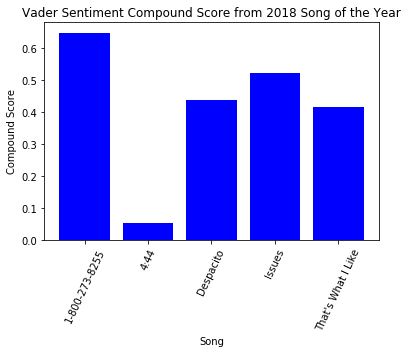

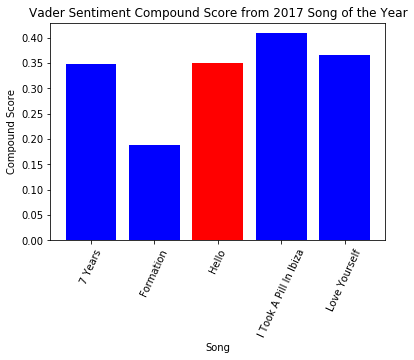

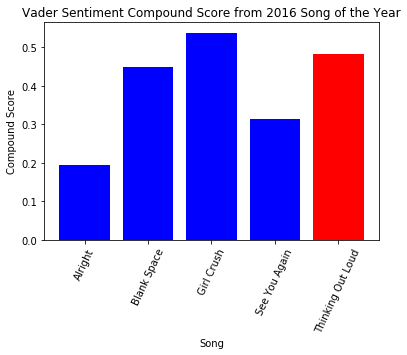

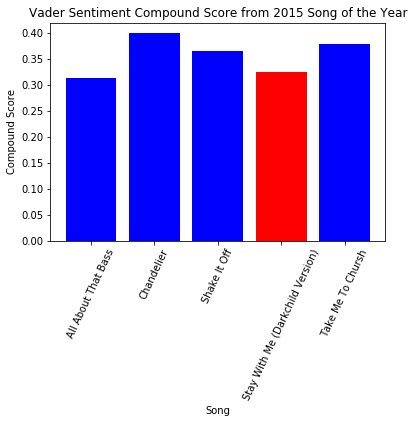

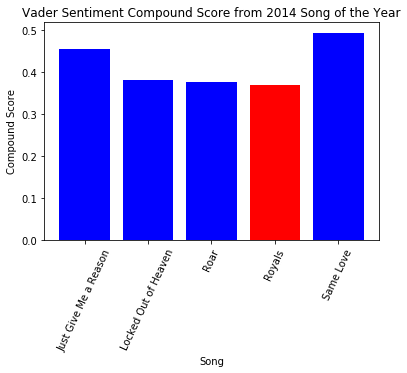

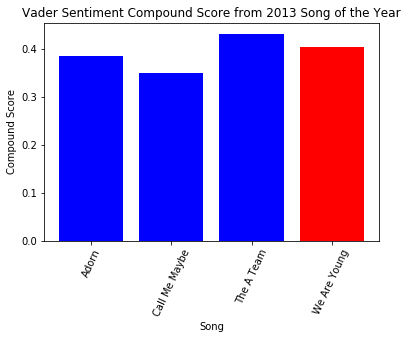

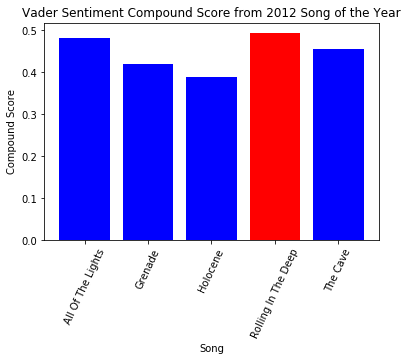

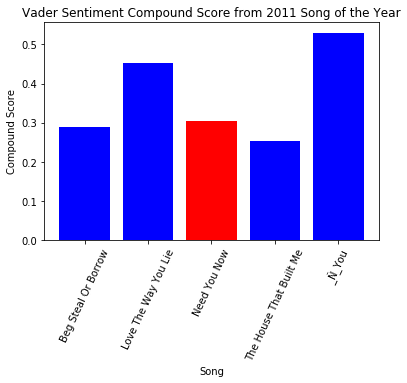

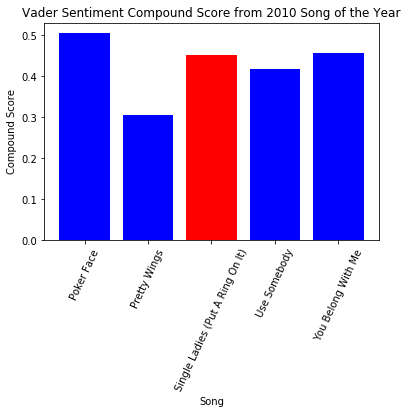

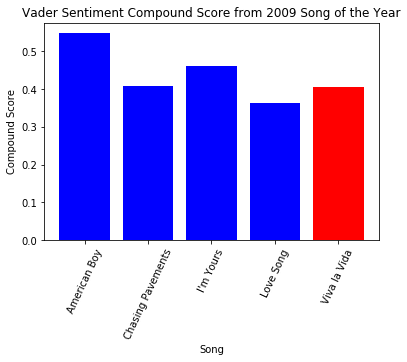

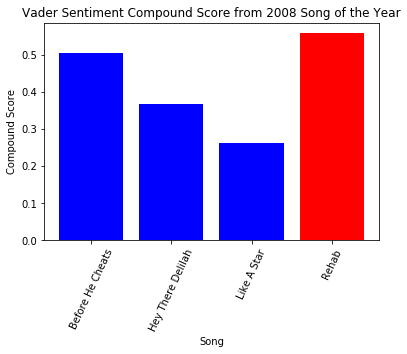

In [33]:
#Plot the necessary graphs for comment sentiments

for year in data_years:
#    plt.figure(figsize=(8, 12))
    x_values = np.arange(len(song_dict[year]))
    compound_score = song_dict[year]['Compound']
    song = song_dict[year]['SONG OF THE YEAR']
    plot_color = song_dict[year]['Color']
    plt.bar(x_values, compound_score, tick_label = song, color=plot_color)
    plt.title(f'Vader Sentiment Compound Score from {year} Song of the Year')
    plt.ylabel('Compound Score')
    plt.xlabel('Song')
    plt.xticks(rotation=65)
    plt.savefig(f'SOY_vader_{year}.png')
    plt.show()